In [10]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
# sklearn imports
from sklearn.model_selection import KFold, cross_validate, learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

In [12]:
t_start = 0
t_end = 40

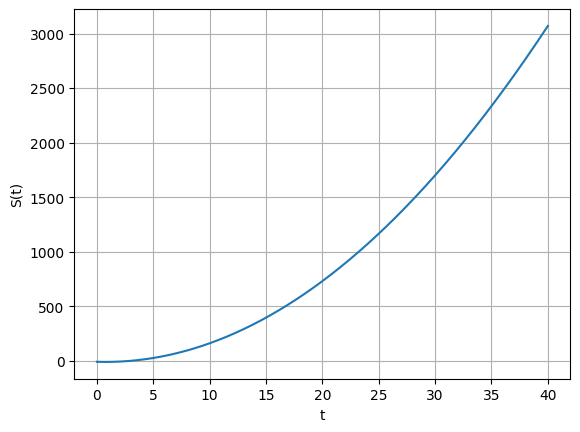

In [13]:
t = np.linspace(t_start, t_end, 1000).reshape(-1, 1)
s = 2 * t**2 - 3 * t - 10

plt.plot(t, s)
plt.xlabel('t')
plt.ylabel('S(t)')
plt.grid()
plt.show()

In [14]:
sigma = 40

np.random.seed(42)

# simulate sampling
t = np.arange(t_start, t_end, 1/2).reshape(-1, 1)
noise = sigma * np.random.randn(t.shape[0], 1)

# function with added noise
s = 2 * t**2 - 3 * t - 10 + noise

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
    ("linear_regression", LinearRegression())
])

scoring = {
    "r2": "r2",
    "rmse": "neg_root_mean_squared_error"
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(pipeline, t, s, cv=kf, scoring=scoring)

r2_scores = results["test_r2"]
rmse_scores = -results["test_rmse"]

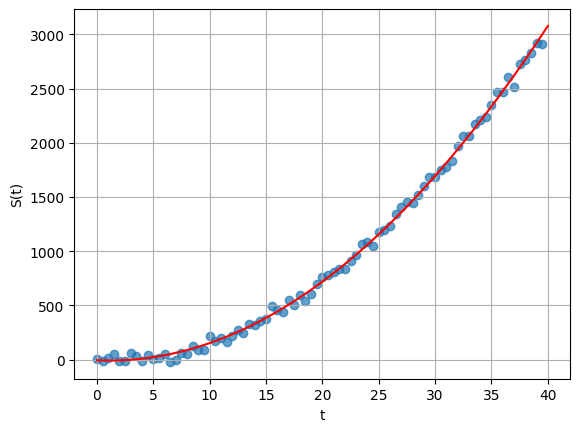

In [15]:
# Fit model
pipeline.fit(t, s)

# Dense grid for smooth curve
t_estimated = np.linspace(t_start, t_end, 1000).reshape(-1, 1)

# Predict
s_estimated = pipeline.predict(t_estimated)

# Plot
plt.scatter(t, s, alpha=0.7)
plt.plot(t_estimated, s_estimated, 'r-')

plt.xlabel("t")
plt.ylabel("S(t)")
plt.grid()
plt.show()

In [16]:
print(f"R^2 per fold: {r2_scores}")
print(f"RMSE per fold: {rmse_scores}")

print("\nOverall Performance:")
print(f"R^2  : {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
print(f"RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")

R^2 per fold: [0.99779481 0.99811111 0.99760377 0.99654653 0.99674246 0.99789579
 0.9996155  0.9997213  0.99800687 0.9966478 ]
RMSE per fold: [34.06517393 35.36475724 42.34543242 48.76036088 40.57570299 45.16683639
 19.53664558 16.83054177 35.6516488  58.67133534]

Overall Performance:
R^2  : 0.9979 ± 0.0011
RMSE: 37.6968 ± 11.9835


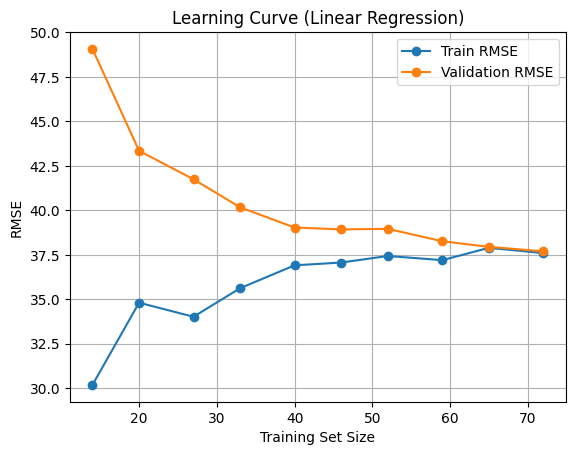

In [17]:
train_sizes = np.linspace(0.2, 1.0, 10)

train_sizes_abs, train_scores, val_scores = learning_curve(
    estimator=pipeline,
    X=t,
    y=s,
    cv=kf,
    scoring="neg_root_mean_squared_error",
    train_sizes=train_sizes,
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Convert negative RMSE to positive
train_rmse = -train_scores
val_rmse = -val_scores

train_mean = train_rmse.mean(axis=1)
val_mean = val_rmse.mean(axis=1)

# Plot
plt.figure()
plt.plot(train_sizes_abs, train_mean, marker="o", label="Train RMSE")
plt.plot(train_sizes_abs, val_mean, marker="o", label="Validation RMSE")

plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

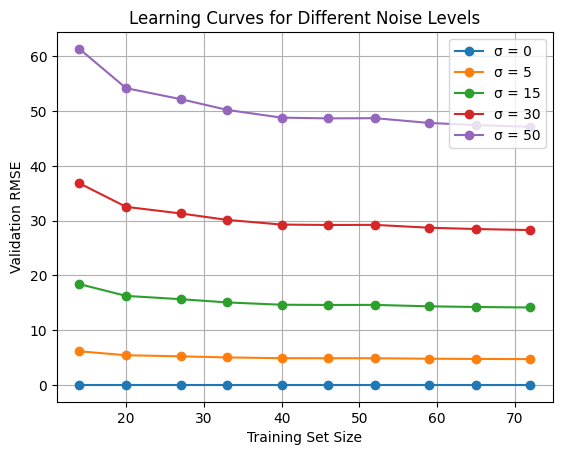

In [18]:
sigmas = [0, 5, 15, 30, 50]

train_sizes = np.linspace(0.2, 1.0, 10)

plt.figure()

for sigma in sigmas:
    np.random.seed(42)
    noise = sigma * np.random.randn(t.shape[0], 1)
    y = 2 * t**2 - 3 * t - 10 + noise

    train_sizes_abs, train_scores, val_scores = learning_curve(
        estimator=pipeline,
        X=t,
        y=y,
        cv=kf,
        scoring="neg_root_mean_squared_error",
        train_sizes=train_sizes,
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    val_rmse = -val_scores.mean(axis=1)

    plt.plot(train_sizes_abs, val_rmse, marker="o", label=f"σ = {sigma}")

plt.xlabel("Training Set Size")
plt.ylabel("Validation RMSE")
plt.title("Learning Curves for Different Noise Levels")
plt.legend()
plt.grid(True)
plt.show()